In [7]:
import numpy as np
import matplotlib.pyplot as plt
import padasip as pa
import pandas as pd
from utils import important_channels
import utils

(1000, 1)
(1000,)


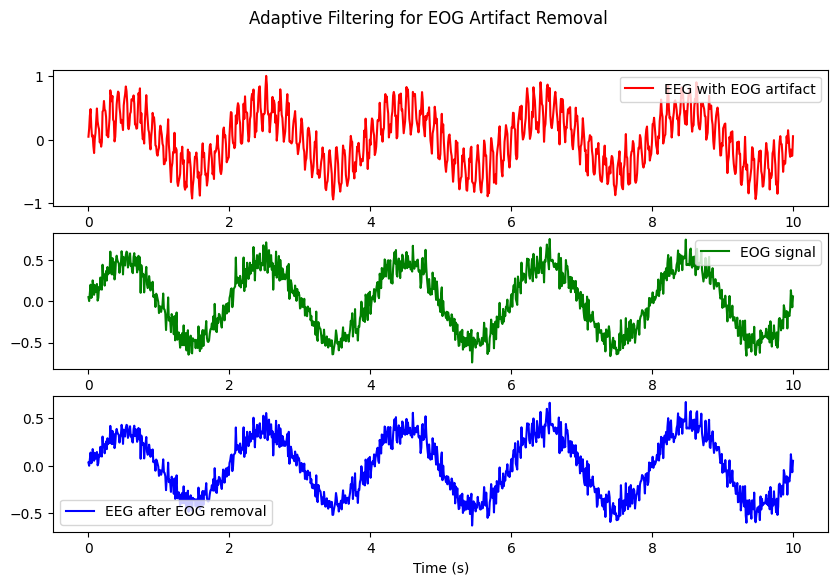

In [15]:
# Simulated EEG and EOG signals (replace with your real data)
np.random.seed(42)
t = np.linspace(0, 10, 1000)  # 10 seconds of data at 100 Hz
eog = 0.5 * np.sin(2 * np.pi * 0.5 * t) + 0.1 * np.random.randn(len(t))  # EOG artifact
brain_signal = 0.3 * np.sin(2 * np.pi * 10 * t)  # Simulated EEG
eeg_raw = brain_signal + eog  # EEG with EOG artifact

# Prepare data for adaptive filtering
X = eog.reshape(-1, 1)  # EOG as reference input
print(X.shape)
d = eeg_raw  # EEG contaminated with EOG
print(d.shape)
# Adaptive filter (LMS algorithm)
lms_filter = pa.filters.FilterLMS(n=1, mu=0.01, w="random")  # 1-tap LMS filter
eeg_cleaned, _, _ = lms_filter.run(d, X)  # Filter EEG

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, eeg_raw, label="EEG with EOG artifact", color='r')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(t, eog, label="EOG signal", color='g')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(t, eeg_cleaned, label="EEG after EOG removal", color='b')
plt.legend()
plt.xlabel("Time (s)")
plt.suptitle("Adaptive Filtering for EOG Artifact Removal")
plt.show()

In [6]:
raw_data = pd.read_csv('data/train/Data_S06_Sess01.csv')
feedback_times = raw_data[raw_data['FeedBackEvent'] == 1]['Time']
feedback_indices = feedback_times.index
fs = 200 # sampling frequency
default_channel = important_channels[0] # channel Cz

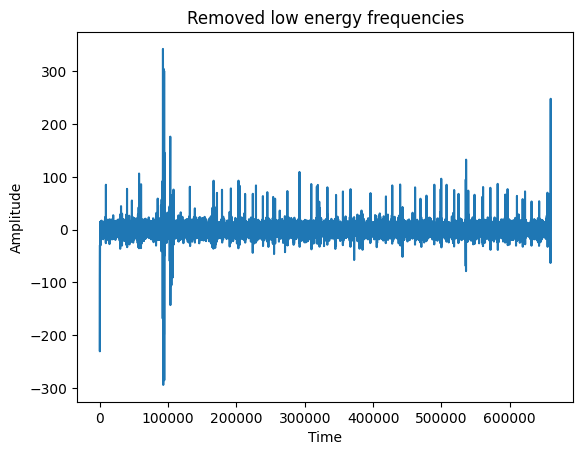

In [8]:
temp = utils.bandpass_filter_all(raw_data, highcut=30)
filtered_data = utils.bandpass_filter_all(temp, lowcut=0.2, highcut=10)
utils.plot_channel(filtered_data, 0, default_channel, title='Removed low energy frequencies')

(132001,) (132001,)


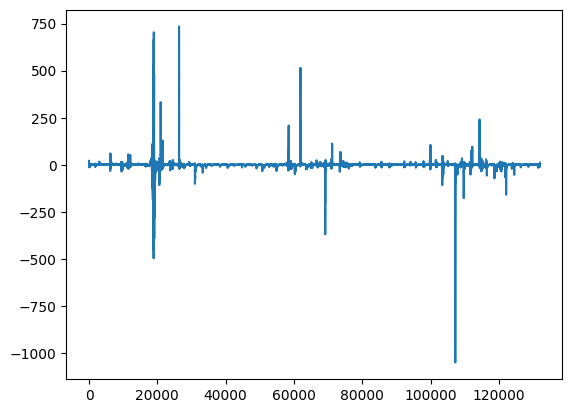

In [29]:
eog_data = filtered_data['EOG'].to_numpy()
eeg_data = filtered_data[default_channel].to_numpy()
print(eog_data.shape, eeg_data.shape)

lms_filter = pa.filters.FilterNLMS(n=1, mu=0.005, w="random")  # 1-tap LMS filter
eeg_cleaned, _, _ = lms_filter.run(eeg_data, eog_data.reshape(-1, 1))  # Filter EEG

plt.plot(eeg_cleaned)